In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from zipfile import ZipFile

## Load and clean CitiBike data

In [16]:
# Open .zip files from Citibike and combine into single .csv

source = '/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/'

for item in os.listdir(source):
    if item.endswith('.zip'):
        file_name = source + item
        zip_ref = ZipFile(file_name)
        zip_ref.extractall(source)
        os.remove(file_name)
        zip_ref.close()

* Create lists of monthly .csv files to combine 

In [17]:
os.chdir(source)

In [21]:
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]

len(all_files)

12

In [22]:
bike_file = pd.concat([pd.read_csv(f) for f in all_files])
bike_file.to_csv('bike_trips_20.csv', index=False, encoding='utf-8-sig')

* Load .csv as Pandas DataFrame

In [24]:
bike_trips = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/bike_trips_20.csv')

In [25]:
bike_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [26]:
bike_trips.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
19506852,1587,2020-01-31 23:59:26.8820,2020-02-01 00:25:54.4890,3244,University Pl & E 8 St,40.731437,-73.994903,3092,Berry St & N 8 St,40.719009,-73.958525,40662,Subscriber,1990,1
19506853,222,2020-01-31 23:59:32.6410,2020-02-01 00:03:15.4720,383,Greenwich Ave & Charles St,40.735238,-74.000271,383,Greenwich Ave & Charles St,40.735238,-74.000271,28722,Subscriber,1983,1
19506854,163,2020-01-31 23:59:39.1780,2020-02-01 00:02:23.0400,150,E 2 St & Avenue C,40.720874,-73.980858,411,E 6 St & Avenue D,40.722281,-73.976687,32530,Subscriber,1958,2
19506855,327,2020-01-31 23:59:49.2310,2020-02-01 00:05:16.3790,483,E 12 St & 3 Ave,40.732233,-73.988900,3718,E 11 St & Avenue B,40.727464,-73.979504,15314,Customer,1994,1
19506856,484,2020-01-31 23:59:57.0360,2020-02-01 00:08:01.1820,327,Vesey Pl & River Terrace,40.715338,-74.016584,534,Water - Whitehall Plaza,40.702551,-74.012723,30947,Subscriber,1987,1


In [28]:
bike_trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19506857 entries, 0 to 19506856
Data columns (total 15 columns):
 #   Column                   Non-Null Count     Dtype  
---  ------                   --------------     -----  
 0   tripduration             19506857 non-null  int64  
 1   starttime                19506857 non-null  object 
 2   stoptime                 19506857 non-null  object 
 3   start station id         19506857 non-null  int64  
 4   start station name       19506857 non-null  object 
 5   start station latitude   19506857 non-null  float64
 6   start station longitude  19506857 non-null  float64
 7   end station id           19506857 non-null  int64  
 8   end station name         19506857 non-null  object 
 9   end station latitude     19506857 non-null  float64
 10  end station longitude    19506857 non-null  float64
 11  bikeid                   19506857 non-null  int64  
 12  usertype                 19506857 non-null  object 
 13  birth year               

* Convert date from string to datetime and add columns for day, month, day of week

In [29]:
bike_trips['starttime'] = pd.to_datetime(bike_trips['starttime'])
bike_trips['stoptime'] = pd.to_datetime(bike_trips['stoptime'])

In [87]:
# basetrip weather off of starttime

bike_trips['day_month'] = bike_trips['starttime'].dt.day
bike_trips['month'] = bike_trips['starttime'].dt.month
bike_trips['day_week'] = bike_trips['starttime'].dt.dayofweek
bike_trips['hour_day'] = bike_trips['starttime'].dt.hour

In [89]:
bike_trips.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,day_start,month_start,wk_day_start,day_month,month,day_week,hour_day
19506852,1587,2020-01-31 23:59:26.882,2020-02-01 00:25:54.489,3244,University Pl & E 8 St,40.731437,-73.994903,3092,Berry St & N 8 St,40.719009,...,Subscriber,1990,1,31,1,4,31,1,4,23
19506853,222,2020-01-31 23:59:32.641,2020-02-01 00:03:15.472,383,Greenwich Ave & Charles St,40.735238,-74.000271,383,Greenwich Ave & Charles St,40.735238,...,Subscriber,1983,1,31,1,4,31,1,4,23
19506854,163,2020-01-31 23:59:39.178,2020-02-01 00:02:23.040,150,E 2 St & Avenue C,40.720874,-73.980858,411,E 6 St & Avenue D,40.722281,...,Subscriber,1958,2,31,1,4,31,1,4,23
19506855,327,2020-01-31 23:59:49.231,2020-02-01 00:05:16.379,483,E 12 St & 3 Ave,40.732233,-73.988900,3718,E 11 St & Avenue B,40.727464,...,Customer,1994,1,31,1,4,31,1,4,23
19506856,484,2020-01-31 23:59:57.036,2020-02-01 00:08:01.182,327,Vesey Pl & River Terrace,40.715338,-74.016584,534,Water - Whitehall Plaza,40.702551,...,Subscriber,1987,1,31,1,4,31,1,4,23


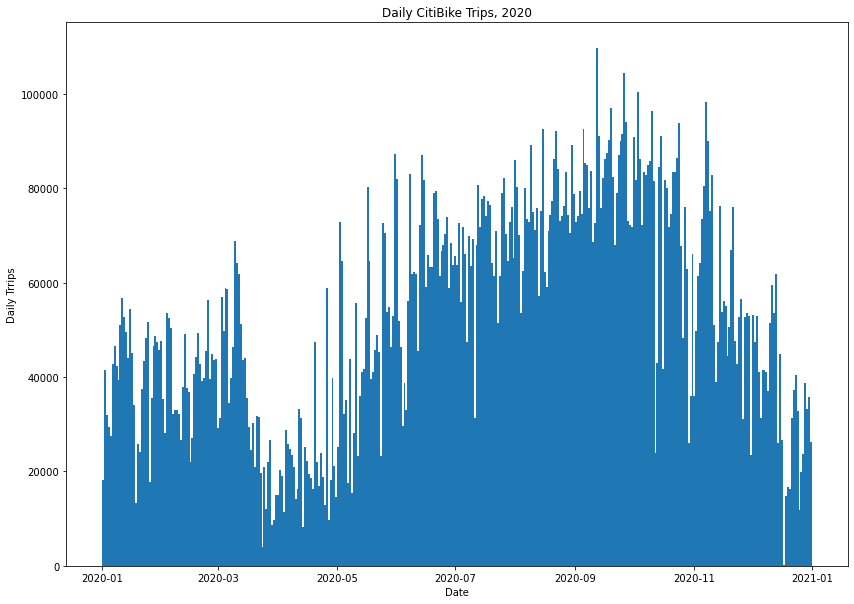

In [90]:
# Quick/dirty histogram of all 19.5 million + trips in 365 buckets

fig, ax = plt.subplots(figsize=(14,10))

ax.hist(bike_trips['starttime'], bins=365)
ax.set_ylabel('Daily Trrips')
ax.set_xlabel('Date')
ax.set_title('Daily CitiBike Trips, 2020');

## Load and clean weather data 

Report type = FM15 only

Daily = 
KG1(dew), 
RH1(relative humidity)

TMP : Temperature - TMP

AA1 : Liquid-Precipitation (Hourly) - AA1 (period hours, depth cm, condition, quality)

A1 : Snow-Accumulation - AL1 (period hours, depth cm, condition, quality)

AJ1 : Snow-Depth - AJ1 (cm, condition, quality, eq water depth mm x 10, eq water condition code, quality) 

AW1 : present weather observation, see isd doc for codes

OC1 : Wind-Gust-Observation - OC1 (speed x 10 meters/sec, quality)

WND : Wind-Observation - WIND

GD1 : Sky-Cover-Summation-State - GD1 ** (coverage code {overcast}, oktas, quality, height, quality, characteristic)

In [295]:
weather_df = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/2019_2020_daily_weather.csv')

# To add: data types tags to import ex: pd.read_csv('data/x.csv', dtype={"user_id": int, "username": "string"})

/Users/jonleckie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [296]:
# Drop unecessary columns and rename remaining columns from ISD codes to plain English

to_drop = ['AA2','AA3','AJ1', 'AL1','CALL_SIGN', 'CALL_SIGN.1', 
           'GA2','GA3','GE1','KB1','KG1','RH1','RH2','RH3', 'QUALITY_CONTROL',
          'STATION', 'NAME', 'LONGITUDE', 'LATITUDE', 'SOURCE', 'ELEVATION']

weather_df.drop(to_drop, axis=1, inplace=True)

weather_df.rename(columns={'TMP':'Temp, C', 
           'AA1':'Precipitation, cm', 
           'AW1': 'Present Obvs', 
           'OC1': 'Wind Gusts, m/s',
           'WND': 'Wind',
           'GD1': 'Cond, cat',
           'VIS': 'Visibility',
           'GA1': 'Cond, oktas'}, inplace=True)
    
weather_df.head(1)

,DATE,REPORT_TYPE,"Precipitation, cm",Present Obvs,DEW,"Cond, oktas","Cond, cat","Wind Gusts, m/s","Temp, C",Visibility,Wind
0,2019-01-01T00:10:00,FM-16,"01,0010,3,1","10,5","+0056,5","08,5,+00213,5,99,9","4,99,1,+00213,5,1",NaN,"+0067,5","004023,5,N,5","999,9,N,9999,9"


In [368]:
# Convert date to datetime and add columns for day of month, month, year, day of week, and hour of day

weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

weather_df['Day_Month'] = weather_df['DATE'].dt.day
weather_df['Month'] = weather_df['DATE'].dt.month
weather_df['Year'] = weather_df['DATE'].dt.year
weather_df['Day_Week'] = weather_df['DATE'].dt.dayofweek
weather_df['Hour_Day'] = weather_df['DATE'].dt.hour

In [298]:
# Filter entire data set by FM-15 report type and year=2020. 
# Other report types exist in dataset. They are either daily/monthly or inconsistent special reports. 
# FM-15 reports happen every hour on the 51st minute of the hour.

weather_df = weather_df.loc[(weather_df['REPORT_TYPE'] == 'FM-15') & (weather_df['Year'] == 2020)]
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 11998 to 23568
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               8787 non-null   datetime64[ns]
 1   REPORT_TYPE        8787 non-null   object        
 2   Precipitation, cm  8737 non-null   object        
 3   Present Obvs       1126 non-null   object        
 4   DEW                8787 non-null   object        
 5   Cond, oktas        8462 non-null   object        
 6   Cond, cat          8510 non-null   object        
 7   Wind Gusts, m/s    1389 non-null   object        
 8   Temp, C            8787 non-null   object        
 9   Visibility         8787 non-null   object        
 10  Wind               8787 non-null   object        
 11  Day_Month          8787 non-null   int64         
 12  Month              8787 non-null   int64         
 13  Year               8787 non-null   int64         
 14  Day

In [ ]:
'''
-0172,5     00,5,+99999,9,99,9	   01,0000,9,5	   -0056,5
-0167,5 	00,5,+99999,9,99,9	   01,0000,9,5	   -0056,5
-0161,5 	00,5,+99999,9,99,9	   01,0000,9,5	   -0061,5
-0161,5 	00,5,+99999,9,99,9	   01,0000,9,5	   -0061,5
-0167,5	    00,5,+99999,9,99,9	   01,0000,9,5	   -0061,5
'''

# Federal Climate Complex Data Documentation for Integrated Surface Data:
# https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf

In [336]:
# functions to filter columns for proper info.

def C_to_F(num):
    return (num * (9/5)) + 32

# These functions (temp and dew) are the same , find better name and delete 
def temp_col(temp):
    temp = temp.split(',')
    temp = temp[0].lstrip('+')
    temp = int(temp)/10 # orginal data has scaling factor of 10 
    temp = C_to_F(temp) # convert celcius to fahrenheit
    return temp

def dew_point(point):
    point = point.split(',')
    point = point[0].lstrip('+')
    point = int(point)/10 # orginal data has scaling factor of 10 
    point = C_to_F(point)
    return point

# dew point, will also use for humidity analysis 

'''From NOAA: 
        If you want a real judge of just how "dry" or "humid" it will feel outside, look at the dew point instead of the RH. 
        The higher the dew point, the muggier it will feel.

        General comfort levels USING DEW POINT that can be expected during the summer months:
            * less than or equal to 55: dry and comfortable
            * between 55 and 65: becoming "sticky" with muggy evenings
            * greater than or equal to 65: lots of moisture in the air, becoming oppressive

            https://www.weather.gov/arx/why_dewpoint_vs_humidity#:~:text=The%20dew%20point%20is%20the,(RH)%20of%20100%25.&text=The%20higher%20the%20dew%20point,comfortable%22%20it%20will%20feel%20outside.
'''

# precipitation in mm
def precip_col(amt):
    if amt == '0':
        return 0
    else:
        amt = amt.split(',')
        return int(amt[1])/10

# Conditions, oktas
def get_oktas(okta):
    okta = okta.split(',')
    if okta[0] == '99':
        return '0'
    return okta[0]

# Convert wind gusts to ints and mph
def get_gusts(gust):
    gust = gust.split(',')
    mph = int(gust[0]) * 2.237
    return mph / 10

In [300]:
# 'Present Obvs' involves categorical observations. Code below creates a dictionary from orginal condition codes
# It then provides a function for mapping the categorical observations on to the column (but i may just be able to use the dict?)

conds = ['0 = No significant weather observe',
 '1 = Clouds generally dissolving or becoming less developed',
 '2 = State of sky on the whole unchanged during the past hour',
 '3 = Clouds generally forming or developing during the past hour',
 '4 = Haze, smoke, or dust in suspension in the air, visibility equal to or greater than 1km',
 '5 = Smoke',
 '7 = Dust or sand raised by wind at or near the station',
 '10 = Mist',
 '11 = Diamond dust',
 '12 = Distant lightning',
 '18 = Squalls',
 '20 = Fog',
 '21 = Precipitation',
 '22 = Drizzle (not freezing) or snow grains',
 '23 = Rain (not freezing)',
 '24 = Snow',
 '25 = Freezing drizzle or freezing rain',
 '26 = Thunderstorm (with or without precipitation)',
 '27 = Blowing or drifting snow or sand',
 '28 = Blowing or drifting snow or sand, visibility equal to or greater than 1 km',
 '29 = Blowing or drifting snow or sand, visibility less than 1 km',
 '30 = Fog',
 '31 = Fog or ice fog in patches',
 '32 = Fog or ice fog, has become thinner during the past hour',
 '33 = Fog or ice fog, no appreciable change during the past hour',
 '34 = Fog or ice fog, has begun or become thicker during the past hour',
 '35 = Fog, depositing rime',
 '40 = Precipitation',
 '41 = Precipitation, slight or moderate',
 '42 = Precipitation, heavy',
 '43 = Liquid precipitation, slight or moderate',
 '44 = Liquid precipitation, heavy',
 '45 = Solid precipitation, slight or moderate',
 '46 = Solid precipitation, heavy',
 '47 = Freezing precipitation, slight or moderate',
 '48 = Freezing precipitation, heavy',
 '50 = Drizzle',
 '51 = Drizzle, not freezing, slight',
 '52 = Drizzle, not freezing, moderate',
 '53 = Drizzle, not freezing, heavy',
 '54 = Drizzle, freezing, slight',
 '55 = Drizzle, freezing, moderate',
 '56 = Drizzle, freezing, heavy',
 '57 = Drizzle and rain, slight',
 '58 = Drizzle and rain, moderate or heavy',
 '60 = Rain',
 '61 = Rain, not freezing, slight',
 '62 = Rain, not freezing, moderate',
 '63 = Rain, not freezing, heavy',
 '64 = Rain, freezing, slight',
 '65 = Rain, freezing, moderate',
 '66 = Rain, freezing, heavy',
 '67 = Rain or drizzle and snow, slight',
 '68 = Rain or drizzle and snow, moderate or heavy',
 '70 = Snow',
 '71 = Snow, slight',
 '72 = Snow, moderate',
 '73 = Snow, heavy',
 '74 = Ice pellets, slight',
 '75 = Ice pellets, moderate',
 '76 = Ice pellets, heavy',
 '77 = Snow grains',
 '78 = Ice crystals',
 '80 = Showers or intermittent precipitation',
 '81 = Rain showers or intermittent rain, slight',
 '82 = Rain showers or intermittent rain, moderate',
 '83 = Rain showers or intermittent rain, heavy',
 '84 = Rain showers or intermittent rain, violent',
 '85 = Snow showers or intermittent snow, slight',
 '86 = Snow showers or intermittent snow, moderate',
 '87 = Snow showers or intermittent snow, heavy',
 '89 = Hail',
 '90 = Thunderstorm',
 '91 = Thunderstorm, slight or moderate, with no precipitation',
 '92 = Thunderstorm, slight or moderate, with rain showers and/or snow showers',
 '93 = Thunderstorm, slight or moderate, with hail',
 '94 = Thunderstorm, heavy, with no precipitation',
 '95 = Thunderstorm, heavy, with rain showers and/or snow',
 '96 = Thunderstorm, heavy, with hail',
 '99 = Tornado']

conditions_dict = {}
for cond in conds:
    cond = cond.split('=')
    conditions_dict[cond[0].strip()] = cond[1].strip()

#fill NaN with '0', then clean, then map dict
# For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

def clean_conditions(cond):
    if cond == '0':
        return cond
    elif type(cond) == type('str'):
        cond = cond.split(',')
        return cond[0].strip()

In [301]:
covers = ['0 = Clear - No coverage',
 '1 = FEW - 2/8 or less coverage (not including zero)',
 '2 = SCATTERED - 3/8-4/8 coverage',
 '3 = BROKEN - 5/8-7/8 coverage',
 '4 = OVERCAST - 8/8 coverage',
 '5 = OBSCURED',
 '6 = PARTIALLY OBSCURED',
 '9 = MISSING']

cover_dict = {}
for cover in covers:
    cover = cover.split('=')
    cover_dict[cover[0].strip()] = cover[1].strip()

#fill NaN with 0, then clean, then map dict
# For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

# use clean_conditions() clean 'Cond, cat'

In [339]:
# cleaning data frame columns 


# Precipitation, cm  8737 non-null   object       
weather_df['Precipitation, cm'].fillna('0', inplace=True)
weather_df['Precip, mm'] = weather_df['Precipitation, cm'].apply(precip_col)


# Present Obvs       1126 non-null   object 
# ---> fill NaN with '0', then clean, then map dict 
weather_df['Present Obvs'].fillna('0', inplace=True)
weather_df['Obvs'] = weather_df['Present Obvs'].apply(clean_conditions)
weather_df['Obvs'] = weather_df['Obvs'].map(conditions_dict)


# DEW                8787 non-null   object        
weather_df['Dew Point'] = weather_df['DEW'].apply(temp_col)


# Cond, oktas        8462 non-null   object 
weather_df['Cond, oktas'].fillna('0', inplace=True)
weather_df['Cond #'] = weather_df['Cond, oktas'].apply(get_oktas)


# Cond, cat          8510 non-null   object    
# ---> fill NaN with 0, then clean, then map dict
weather_df['Cond, cat'].fillna('0', inplace=True)
weather_df['Condition'] = weather_df['Cond, cat'].apply(clean_conditions)
weather_df['Condition'] = weather_df['Condition'].map(cover_dict)


# Wind Gusts, m/s    1389 non-null   object 
# ---> fill NaN with 0
weather_df['Wind Gusts, m/s'].fillna('0', inplace=True)
weather_df['Winds'] = weather_df['Wind Gusts, m/s'].apply(get_gusts)


# Temp, C            8787 non-null   object  
# --> will be F after clean
weather_df['Temp,F'] = weather_df['Temp, C'].apply(temp_col)

# Visibility         8787 non-null   object        
# Wind               8787 non-null   object 
# ---> drop both
# weather_df.drop[columns=['Visibility', 'Wind']]

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 11998 to 23568
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               8787 non-null   datetime64[ns]
 1   REPORT_TYPE        8787 non-null   object        
 2   Precipitation, cm  8787 non-null   object        
 3   Present Obvs       8787 non-null   object        
 4   DEW                8787 non-null   object        
 5   Cond, oktas        8787 non-null   object        
 6   Cond, cat          8787 non-null   object        
 7   Wind Gusts, m/s    8787 non-null   object        
 8   Temp, C            8787 non-null   object        
 9   Visibility         8787 non-null   object        
 10  Wind               8787 non-null   object        
 11  Day_Month          8787 non-null   int64         
 12  Month              8787 non-null   int64         
 13  Year               8787 non-null   int64         
 14  Day

In [366]:
columns = ['DATE', 'Temp,F', 'Precip, mm', 'Dew Point', 'Winds', 'Cond #', 
           'Condition', 'Obvs', 'Day_Month', 'Month', 'Year', 'Day_Week', 'Hour_day']

weather_clean = weather_df[['DATE','Temp,F','Precip, mm','Dew Point','Winds','Cond #','Condition','Obvs','Day_Month','Month','Year', 'Day_Week','Hour_Day']]

In [367]:
weather_clean.head()

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day
11998,2020-01-01 00:51:00,44.06,0.0,35.96,0.0000,07,BROKEN - 5/8-7/8 coverage,No significant weather observe,1,1,2020,2,0
11999,2020-01-01 01:51:00,42.98,0.5,35.06,23.0411,04,SCATTERED - 3/8-4/8 coverage,"Rain, not freezing, slight",1,1,2020,2,1
12000,2020-01-01 02:51:00,42.98,0.0,33.08,0.0000,08,OVERCAST - 8/8 coverage,"Rain, not freezing, slight",1,1,2020,2,2
12001,2020-01-01 03:51:00,42.08,0.0,30.02,17.2249,07,BROKEN - 5/8-7/8 coverage,No significant weather observe,1,1,2020,2,3
12002,2020-01-01 04:51:00,41.00,0.0,28.04,19.6856,08,OVERCAST - 8/8 coverage,No significant weather observe,1,1,2020,2,4


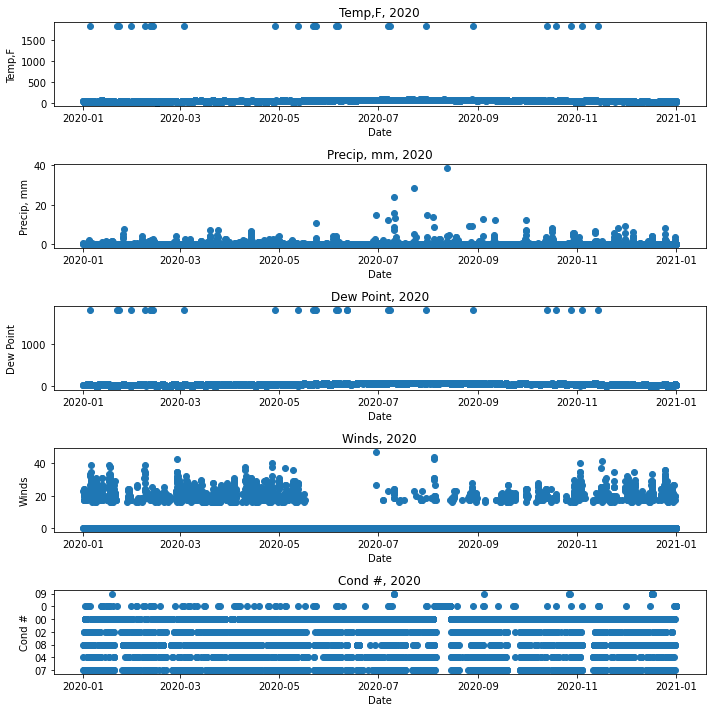

In [385]:
fig, axs = plt.subplots(5, figsize=(10,10))

xs = weather_clean['DATE']
ys = ['Temp,F', 'Precip, mm', 'Dew Point', 'Winds', 'Cond #']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(weather_clean['DATE'], weather_clean[ys[i]])
    ax.set_xlabel('Date')
    ax.set_ylabel(ys[i])
    ax.set_title(f'{ys[i]}, 2020')
    
fig.tight_layout();

In [384]:
# Reviewing for extreme values in temp and dew data. Other categories seem okay for now. 

weather_clean['Temp,F'].describe()

count    8787.000000
mean       62.045702
std        95.884293
min        15.080000
25%        44.060000
50%        55.940000
75%        71.060000
max      1831.820000
Name: Temp,F, dtype: float64

In [397]:
len(weather_clean[weather_clean['Temp,F'] >= 110])

25

In [448]:
len(weather_clean[weather_clean['Dew Point'] > 110])

27

In [398]:
weather_clean[weather_clean['Temp,F'] >= 110]

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day
12150,2020-01-05 05:51:00,1831.82,0.0,1831.82,0.0000,0,OVERCAST - 8/8 coverage,"Rain, not freezing, slight",5,1,2020,6,5
12663,2020-01-22 02:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,22,1,2020,2,2
12681,2020-01-22 19:51:00,1831.82,0.0,1831.82,0.0000,00,Clear - No coverage,No significant weather observe,22,1,2020,2,19
12903,2020-01-30 04:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,30,1,2020,3,4
13225,2020-02-08 00:51:00,1831.82,0.0,1831.82,24.1596,0,BROKEN - 5/8-7/8 coverage,No significant weather observe,8,2,2020,5,0
13357,2020-02-11 11:51:00,1831.82,0.8,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,11,2,2020,1,11
13398,2020-02-12 09:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,12,2,2020,2,9
13430,2020-02-13 07:51:00,1831.82,0.8,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,13,2,2020,3,7
13988,2020-03-03 06:51:00,1831.82,0.3,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,3,3,2020,1,6
15798,2020-04-28 14:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,28,4,2020,1,14


In [400]:
# To address the extreme values: Since data is hourly and no extremes are consecutive, 
# will average the values in the prior and following hour as an extimation of the actual value during the hour
# This was done over dropping 25 entries from a 8700+ point dataset because of the effect it may have on the 
# larger bike dataset and the thousands of rides that would have been lost in these hours. 

'''PAUSE ON THIS TO FIRST MERGE BIKE AND WEATHER DATA. DO LATER MANUALLY'''

weather_copy = weather_clean.copy() 

In [406]:
ex_idxs_temp = list(weather_copy[weather_clean['Temp,F'] >= 110].index)
ex_idx_dew = list(weather_clean[weather_clean['Dew Point'] > 110].index)

25

In [408]:
weather_clean[weather_clean['Dew Point'] > 110]

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day
12150,2020-01-05 05:51:00,1831.82,0.0,1831.82,0.0000,0,OVERCAST - 8/8 coverage,"Rain, not freezing, slight",5,1,2020,6,5
12663,2020-01-22 02:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,22,1,2020,2,2
12681,2020-01-22 19:51:00,1831.82,0.0,1831.82,0.0000,00,Clear - No coverage,No significant weather observe,22,1,2020,2,19
12903,2020-01-30 04:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,30,1,2020,3,4
13225,2020-02-08 00:51:00,1831.82,0.0,1831.82,24.1596,0,BROKEN - 5/8-7/8 coverage,No significant weather observe,8,2,2020,5,0
13357,2020-02-11 11:51:00,1831.82,0.8,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,11,2,2020,1,11
13398,2020-02-12 09:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,12,2,2020,2,9
13430,2020-02-13 07:51:00,1831.82,0.8,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,13,2,2020,3,7
13988,2020-03-03 06:51:00,1831.82,0.3,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,3,3,2020,1,6
15798,2020-04-28 14:51:00,1831.82,0.0,1831.82,0.0000,0,Clear - No coverage,No significant weather observe,28,4,2020,1,14


In [412]:
# 17162 and 17163 = additional dew points


# Trying to merge dataframes 

bike_trips['starttime']
weather_copy['DATE']

weather_copy.tail()

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day
23564,2020-12-31 19:51:00,42.98,0.0,30.02,0.0,0,BROKEN - 5/8-7/8 coverage,No significant weather observe,31,12,2020,3,19
23565,2020-12-31 20:51:00,42.08,0.0,28.04,0.0,0,OVERCAST - 8/8 coverage,No significant weather observe,31,12,2020,3,20
23566,2020-12-31 21:51:00,41.00,0.0,26.96,0.0,0,OVERCAST - 8/8 coverage,No significant weather observe,31,12,2020,3,21
23567,2020-12-31 22:51:00,41.00,0.0,26.96,0.0,0,OVERCAST - 8/8 coverage,No significant weather observe,31,12,2020,3,22
23568,2020-12-31 23:51:00,39.92,0.0,26.06,0.0,0,Clear - No coverage,No significant weather observe,31,12,2020,3,23


In [426]:
bike_trips[(bike_trips['month'] == 11) & (bike_trips['day_month'] == 16) & (bike_trips['hour_day'] == 12)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,day_start,month_start,wk_day_start,day_month,month,day_week,hour_day
10371405,930,2020-11-16 12:00:01.012,2020-11-16 12:15:31.045,3435,Grand St & Elizabeth St,40.718822,-73.995960,342,Columbia St & Rivington St,40.717400,...,Subscriber,1974,2,16,11,0,16,11,0,12
10371406,1004,2020-11-16 12:00:01.312,2020-11-16 12:16:46.104,536,1 Ave & E 30 St,40.741444,-73.975361,445,E 10 St & Avenue A,40.727408,...,Subscriber,1970,1,16,11,0,16,11,0,12
10371407,1419,2020-11-16 12:00:03.395,2020-11-16 12:23:43.217,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,3175,W 70 St & Amsterdam Ave,40.777480,...,Subscriber,1996,2,16,11,0,16,11,0,12
10371408,1981,2020-11-16 12:00:03.497,2020-11-16 12:33:05.303,2012,E 27 St & 1 Ave,40.739445,-73.976806,3410,Dean St & Hoyt St,40.686444,...,Subscriber,1983,2,16,11,0,16,11,0,12
10371409,428,2020-11-16 12:00:04.204,2020-11-16 12:07:12.466,3146,E 81 St & 3 Ave,40.775730,-73.956753,3312,1 Ave & E 94 St,40.781721,...,Subscriber,1970,1,16,11,0,16,11,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10374656,305,2020-11-16 12:59:57.883,2020-11-16 13:05:03.110,3305,E 91 St & 2 Ave,40.781122,-73.949656,3671,E 81 St & 2 Ave,40.774779,...,Subscriber,1964,2,16,11,0,16,11,0,12
10374657,757,2020-11-16 12:59:58.219,2020-11-16 13:12:35.973,297,E 15 St & 3 Ave,40.734232,-73.986923,349,Rivington St & Ridge St,40.718502,...,Customer,1969,0,16,11,0,16,11,0,12
10374658,926,2020-11-16 12:59:58.284,2020-11-16 13:15:25.009,4075,Central Park West & W 85 St,40.784760,-73.969862,3136,5 Ave & E 63 St,40.766368,...,Subscriber,1966,2,16,11,0,16,11,0,12
10374659,1670,2020-11-16 12:59:58.558,2020-11-16 13:27:49.070,4069,Cabrini Blvd & W 177 St,40.848282,-73.941343,3331,Riverside Dr & W 104 St,40.801343,...,Customer,1989,2,16,11,0,16,11,0,12


In [428]:
weather_copy[(weather_copy['Month'] == 11) & (weather_copy['Day_Month'] == 16) & (weather_copy['Hour_Day'] == 12)]

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day
22200,2020-11-16 12:51:00,46.94,0.0,28.04,16.1064,00,Clear - No coverage,No significant weather observe,16,11,2020,0,12


In [429]:
bike_trips.loc[10374659, 'starttime'] == weather_copy.loc[22200, 'DATE']

False

In [430]:
a = bike_trips.loc[10374659, 'starttime']
b = weather_copy.loc[22200, 'DATE']

print(a)
b

2020-11-16 12:59:58.558000


Timestamp('2020-11-16 12:51:00')

In [419]:
bike_trips.loc[19506856, 'starttime']

Timestamp('2020-01-31 23:59:57.036000')

In [416]:
weather_copy.loc[23568, 'DATE']

Timestamp('2020-12-31 23:51:00')

In [452]:
weather_copy['Date_to_Hour'] = str(weather_df['DATE'].dt.month) + str(weather_df['DATE'].dt.day) + str(weather_df['DATE'].dt.hour)

In [453]:
weather_copy.head()

,DATE,"Temp,F","Precip, mm",Dew Point,Winds,Cond #,Condition,Obvs,Day_Month,Month,Year,Day_Week,Hour_Day,Date_to_Hour
11998,2020-01-01 00:51:00,44.06,0.0,35.96,0.0000,07,BROKEN - 5/8-7/8 coverage,No significant weather observe,1,1,2020,2,0,11998 1\n11999 1\n12000 1\n12001 ...
11999,2020-01-01 01:51:00,42.98,0.5,35.06,23.0411,04,SCATTERED - 3/8-4/8 coverage,"Rain, not freezing, slight",1,1,2020,2,1,11998 1\n11999 1\n12000 1\n12001 ...
12000,2020-01-01 02:51:00,42.98,0.0,33.08,0.0000,08,OVERCAST - 8/8 coverage,"Rain, not freezing, slight",1,1,2020,2,2,11998 1\n11999 1\n12000 1\n12001 ...
12001,2020-01-01 03:51:00,42.08,0.0,30.02,17.2249,07,BROKEN - 5/8-7/8 coverage,No significant weather observe,1,1,2020,2,3,11998 1\n11999 1\n12000 1\n12001 ...
12002,2020-01-01 04:51:00,41.00,0.0,28.04,19.6856,08,OVERCAST - 8/8 coverage,No significant weather observe,1,1,2020,2,4,11998 1\n11999 1\n12000 1\n12001 ...


In [459]:
weather_copy_2 = weather_copy.copy()

